In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import copy
import matplotlib.pyplot as plt
from iaml01cw2_helpers import load_FashionMNIST 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error

/Users/thatsmilersmiles/Downloads/ENTER/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [5]:
#normalisation
sys.path.append('/Users/thatsmilersmiles/Desktop/cw2/INFR10069-2020-CW2-main/helpers')
path = '/Users/thatsmilersmiles/Desktop/cw2/INFR10069-2020-CW2-main/data/fashion'
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(path)
Xtrn_orig = copy.deepcopy(Xtrn)
Xtst_orig = copy.deepcopy(Xtst)
Xtrn = Xtrn / 255.0
Xtst = Xtst / 255.0
Xmean = np.mean(Xtrn, axis = 0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
Xtrn_nm.shape

(60000, 784)

1.1

In [6]:
#1.1
print(Xtrn_nm[0,:][0:4])
print(Xtrn_nm[783,:][0:4])

[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


1.2

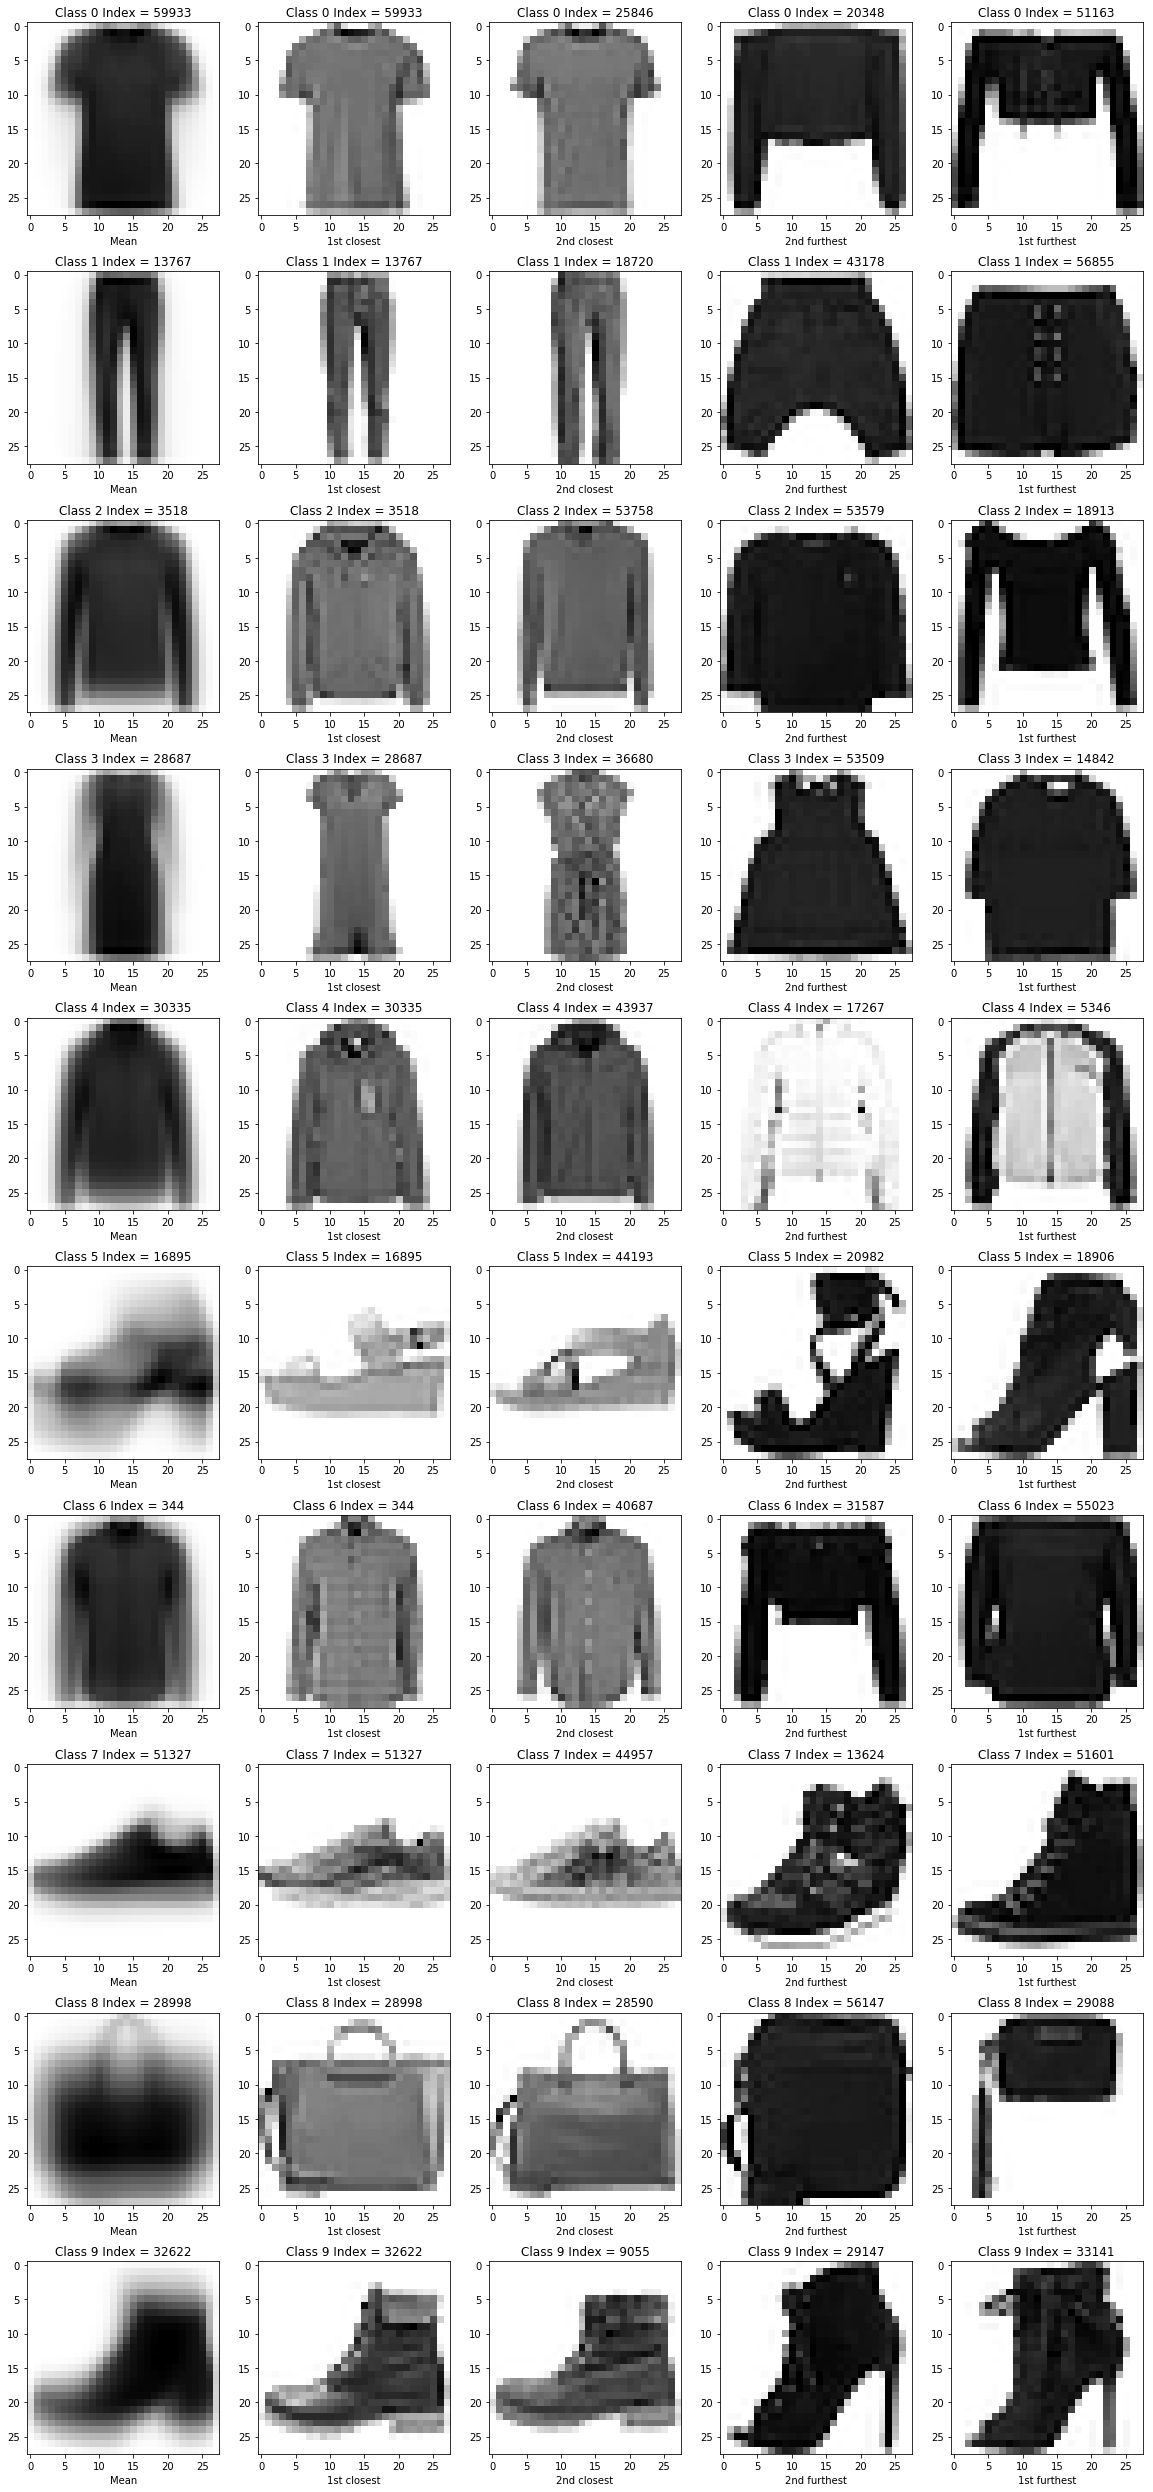

In [8]:
#1.2
fig, axs = plt.subplots(10, 5, figsize = (20, 45))
for clas in range(10):
    dist = (np.sum((Xtrn[Ytrn == clas] - np.mean(Xtrn[Ytrn == clas], 0))**2, axis = 1))**0.5
    clo1 = np.argmin(dist)
    dist_copy1 = copy.deepcopy(dist)
    minimum = np.argmin(dist_copy1)
    dist_copy1[minimum] = np.max(dist)
    clo2 = np.argmin(dist_copy1)
    fur1 = np.argmax(dist)
    dist_copy2 = copy.deepcopy(dist)
    maximum = np.argmax(dist_copy2)
    dist_copy2[maximum] = np.min(dist)
    fur2 = np.argmax(dist_copy2)
    mean = np.mean(Xtrn[Ytrn == clas], axis = 0)
    
    idx = np.argwhere(Ytrn == clas)
    axs[clas, 0].imshow(mean.reshape(28, 28), cmap = 'gray_r') 
    axs[clas, 1].imshow(Xtrn[idx[clo1]].reshape(28, 28), cmap = 'gray_r')
    axs[clas, 2].imshow(Xtrn[idx[clo2]].reshape(28, 28), cmap = 'gray_r')
    axs[clas, 3].imshow(Xtrn[idx[fur2]].reshape(28, 28), cmap = 'gray_r')
    axs[clas, 4].imshow(Xtrn[idx[fur1]].reshape(28, 28), cmap = 'gray_r')
    axs[clas, 0].set_title('Class %s Index = %d' %(clas, idx[clo1]))
    axs[clas, 0].set_xlabel('Mean')
    axs[clas, 1].set_title('Class %s Index = %d' %(clas, idx[clo1]))
    axs[clas, 1].set_xlabel('1st closest')
    axs[clas, 2].set_title('Class %s Index = %d' %(clas, idx[clo2]))
    axs[clas, 2].set_xlabel('2nd closest')
    axs[clas, 3].set_title('Class %s Index = %d' %(clas, idx[fur2]))
    axs[clas, 3].set_xlabel('2nd furthest')
    axs[clas, 4].set_title('Class %s Index = %d' %(clas, idx[fur1]))
    axs[clas, 4].set_xlabel('1st furthest')  
    

1.3

In [9]:
#1.3
pca = PCA(n_components = 5)
pca.fit_transform(Xtrn_nm)
pca.explained_variance_

array([19.80980567, 12.11221047,  4.10615661,  3.38182839,  2.62477022])

1.4

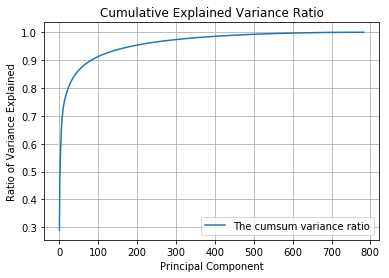

In [11]:
#1.4
cm = PCA()
cm.fit_transform(Xtrn_nm)
cm.explained_variance_.cumsum()
variance = cm.explained_variance_ratio_
cuvar = np.cumsum(cm.explained_variance_ratio_)
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Ratio of Variance Explained')
plt.plot(cuvar, label = 'The cumsum variance ratio')
plt.legend()
plt.grid()
plt.show()

1.5

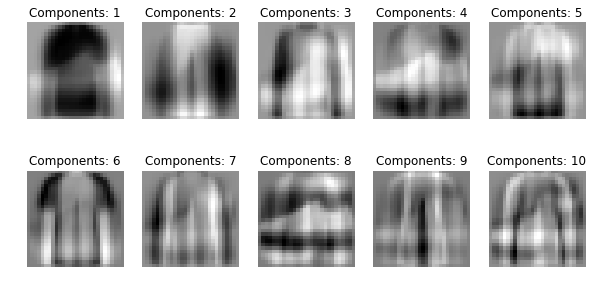

In [12]:
#1.5
plt.figure(figsize = (10, 5))
pca = PCA()
pca.fit(Xtrn_nm)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap = 'gray_r')
    plt.axis('off')
    plt.title("Components: " + str(i + 1))
plt.show()    

1.6

In [13]:
#1.6
K = [5, 20, 50, 200]
for k in K:
    print("K = ", k)
    pca = PCA(n_components = k, random_state = 1)
    pca.fit(Xtrn_nm)
    for clas in range(10):
        first_index = np.where(Ytrn == clas)[0]
        components = pca.fit_transform(Xtrn_nm)
        reconstructed = pca.inverse_transform(components)
        rmse = np.sqrt(mean_squared_error(Xtrn_nm[first_index[0]], reconstructed[first_index[0]]))
        print("Class {}: {}".format(clas, rmse)) 
    

K =  5
Class 0: 0.2561486638821905
Class 1: 0.19802439610928843
Class 2: 0.198700155632319
Class 3: 0.14565797934153135
Class 4: 0.118208703067554
Class 5: 0.18112976154332386
Class 6: 0.1294792775623788
Class 7: 0.1656253830522969
Class 8: 0.22339658761007578
Class 9: 0.18351042090797035
K =  20
Class 0: 0.14994404744705891
Class 1: 0.14049868792619208
Class 2: 0.14560492050763477
Class 3: 0.10727076271213501
Class 4: 0.10267081458013609
Class 5: 0.15859421251464592
Class 6: 0.09590087349240005
Class 7: 0.1278335945363849
Class 8: 0.14493312891065033
Class 9: 0.15105785565452282
K =  50
Class 0: 0.12717792571753697
Class 1: 0.09491911734725754
Class 2: 0.12433940313268758
Class 3: 0.08325937443793047
Class 4: 0.08808402122964487
Class 5: 0.14266886231112147
Class 6: 0.07197499858617742
Class 7: 0.10659798294580496
Class 8: 0.12374574001181085
Class 9: 0.1215739680148314
K =  200
Class 0: 0.0610676824646075
Class 1: 0.03793954568718067
Class 2: 0.08028060573578955
Class 3: 0.0564653481

1.7

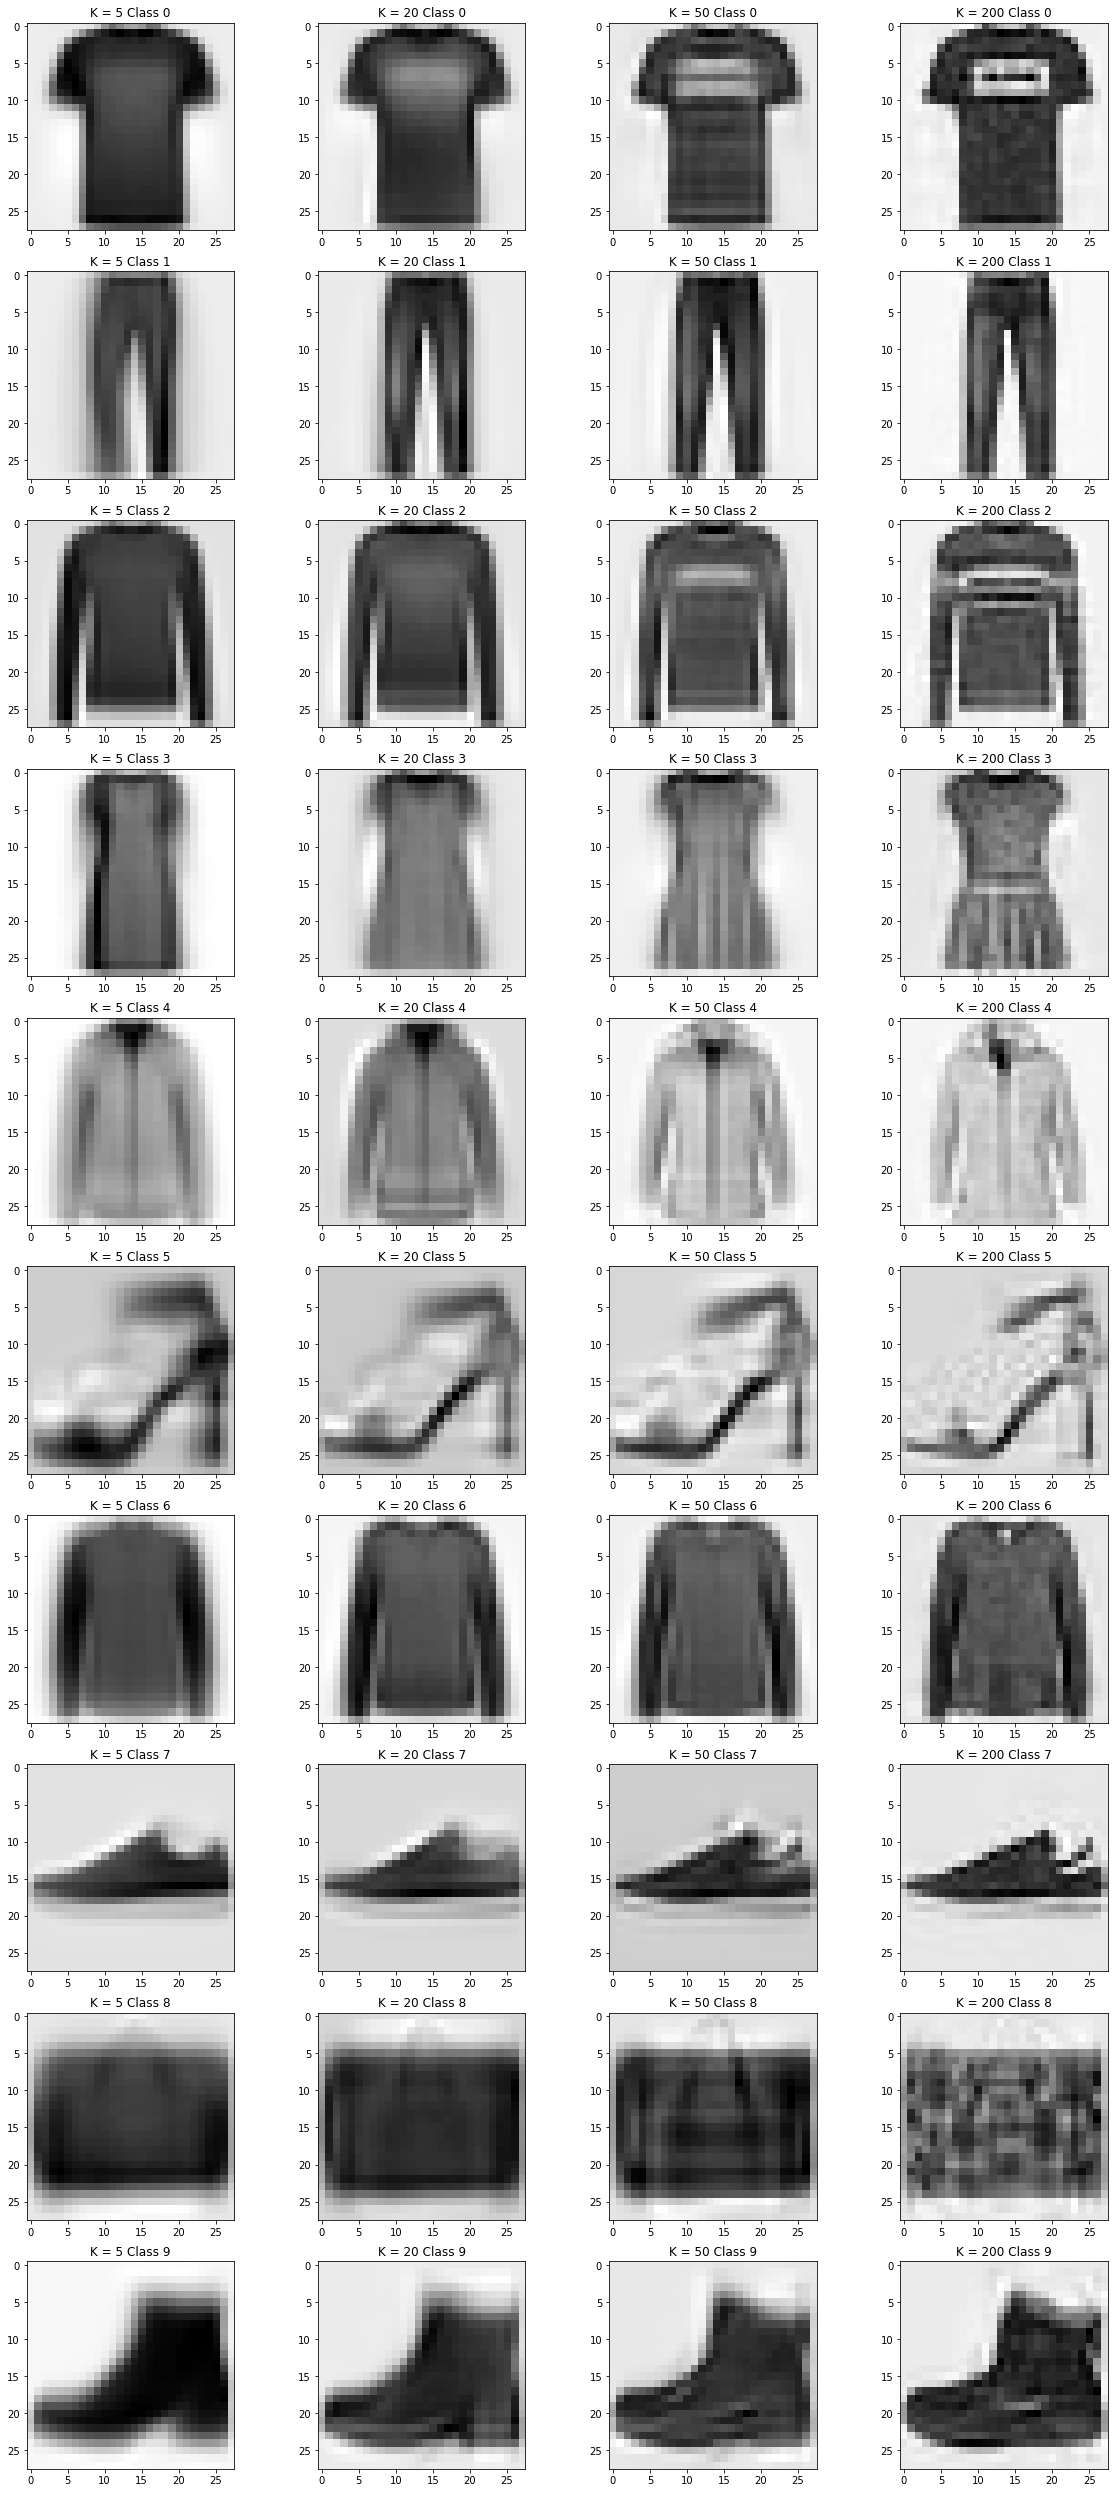

In [14]:
#1.7
fig, axs = plt.subplots(10, 4, figsize = (20, 45))
K = [5, 20, 50, 200]
pca = PCA(n_components = K[0])
for clas in range(10):
    idx = np.where(Ytrn == clas)
    idxx = np.argwhere(Ytrn == clas)
    pca.fit(Xtrn_nm[idx])
    pc = pca.fit_transform(Xtrn_nm[idx])
    reconstructed = pca.inverse_transform(pc[0])
    reconstructed += Xmean
    axs[clas, 0].imshow(reconstructed.reshape(28, 28), cmap = 'gray_r')
    axs[clas, 0].set_title('K = %d Class %d' %(K[0], clas))
    
pca = PCA(n_components = K[1])
for clas in range(10):
    idx = np.where(Ytrn == clas)
    idxx = np.argwhere(Ytrn == clas)
    pca.fit(Xtrn_nm[idx])
    pc = pca.fit_transform(Xtrn_nm[idx])
    reconstructed = pca.inverse_transform(pc[0])
    reconstructed += Xmean
    axs[clas, 1].imshow(reconstructed.reshape(28, 28), cmap = 'gray_r')
    axs[clas, 1].imshow(reconstructed.reshape(28, 28), cmap = 'gray_r')
    axs[clas, 1].set_title('K = %d Class %d' %(K[1], clas))
    
pca = PCA(n_components = K[2])
for clas in range(10):
    idx = np.where(Ytrn == clas)
    idxx = np.argwhere(Ytrn == clas)
    pca.fit(Xtrn_nm[idx])
    pc = pca.fit_transform(Xtrn_nm[idx])
    reconstructed = pca.inverse_transform(pc[0])
    reconstructed += Xmean
    axs[clas, 2].imshow(reconstructed.reshape(28, 28), cmap = 'gray_r')
    axs[clas, 2].imshow(reconstructed.reshape(28, 28), cmap = 'gray_r')
    axs[clas, 2].set_title('K = %d Class %d' %(K[2], clas))

pca = PCA(n_components = K[3])
for clas in range(10):
    idx = np.where(Ytrn == clas)
    idxx = np.argwhere(Ytrn == clas)
    pca.fit(Xtrn_nm[idx])
    pc = pca.fit_transform(Xtrn_nm[idx])
    reconstructed = pca.inverse_transform(pc[0]) 
    reconstructed += Xmean
    axs[clas, 3].imshow(reconstructed.reshape(28, 28), cmap = 'gray_r')
    axs[clas, 3].imshow(reconstructed.reshape(28, 28), cmap = 'gray_r')
    axs[clas, 3].set_title('K = %d Class %d' %(K[3], clas)) 

1.8

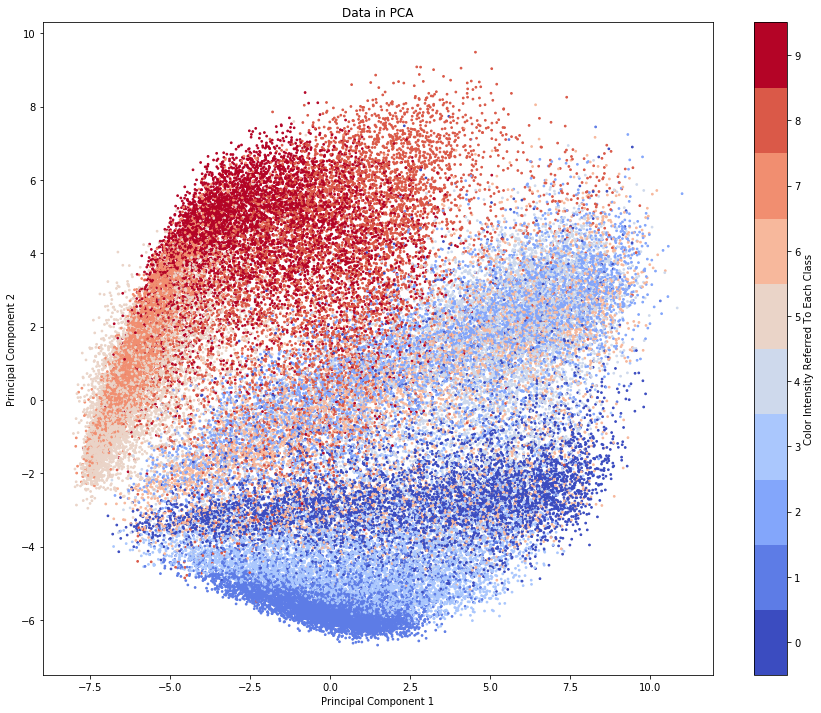

In [15]:
#1.8
pca = PCA(n_components = 2)
pca = pca.fit(Xtrn_nm)
components = pca.fit_transform(Xtrn_nm)
x = components[:, 0]
y = components[:, 1]
plt.subplots(figsize = (15, 12))
scatter = plt.scatter(x, y, c = Ytrn, s = 3, cmap = plt.cm.get_cmap('coolwarm', 10))
plt.title('Data in PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter, ticks = range(10), label = 'Color Intensity Referred To Each Class')
plt.clim(-0.5, 9.5)
plt.show()